<a href="https://colab.research.google.com/github/syamkrishnanharidas/DATA_ANALYTICS_PYTHON_ASSIGNMENT/blob/main/A06_TITANIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset into python environment.

In [ ]:
rawdata = pd.read_csv('/content/titanic_dataset.csv',index_col ='PassengerId')

#  2. Make ‘PassengerId’ as the index column.

In [ ]:
df1= pd.DataFrame(rawdata)
df1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# 3. Check the basic details of the dataset.

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


# 4. Fill in all the missing values present in all the columns in the dataset.

In [ ]:
df1.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

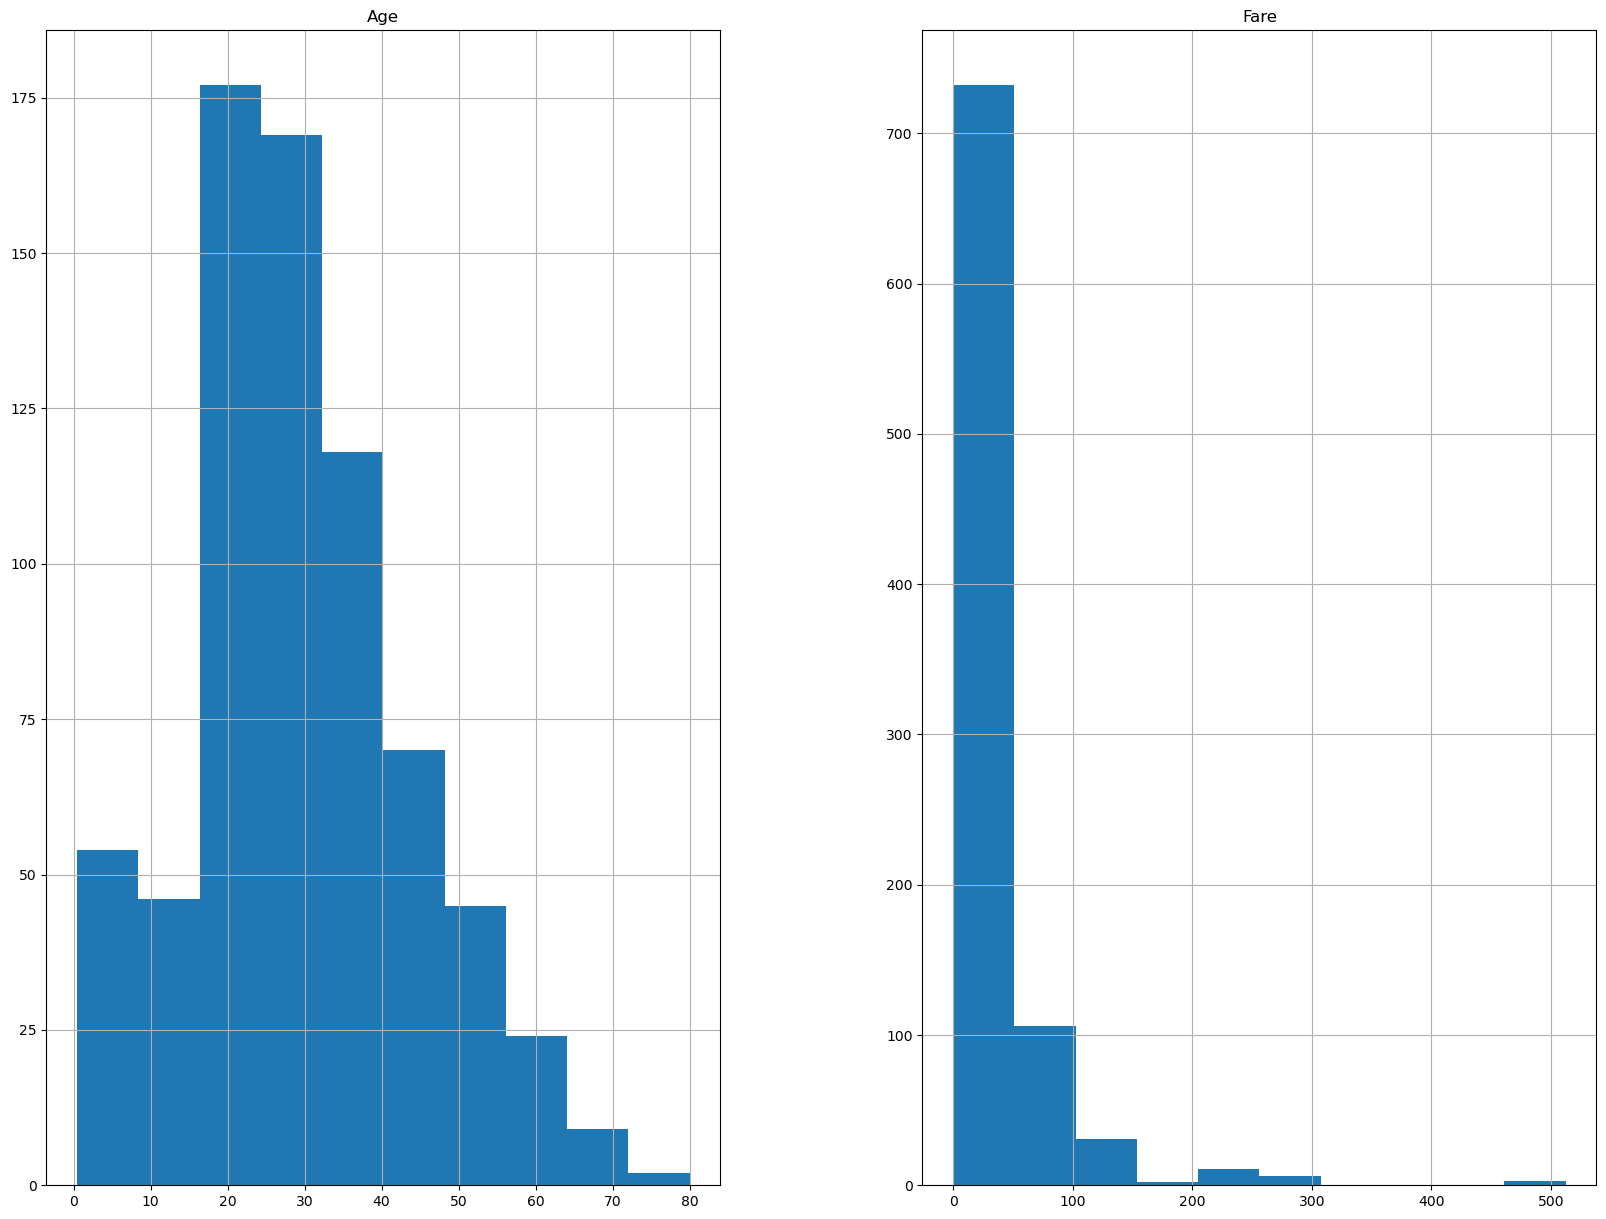

In [ ]:
freq_graph = df1.select_dtypes(include = 'float')
freq_graph.hist(figsize = [20,15])
plt.show()

# Since Age details follows normal distribution we can either choose mean or median.

In [ ]:
df1['Age'] = df1['Age'].fillna(df1['Age'].mean())

#   LABEL ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Sex'] = le.fit_transform(df1['Sex'])
df1['Sex'].nunique()

2

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Cabin'] = le.fit_transform(df1['Cabin'])
df1['Cabin'].nunique()

148

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Embarked'] = le.fit_transform(data['Embarked'])
df1['Embarked'].nunique()

4

In [ ]:
df1.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# 5. Check and handle outliers in at least 3 columns in the dataset.

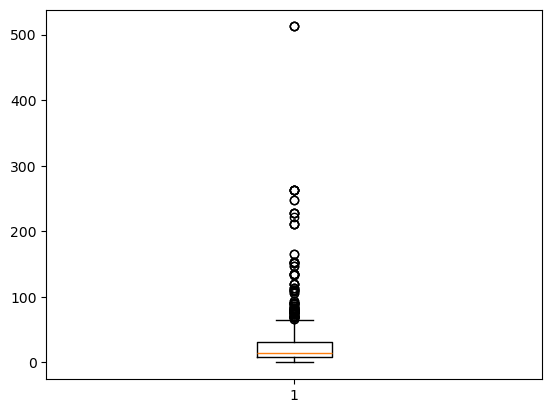

In [ ]:
plt.boxplot(df1['Fare'])
plt.show()

In [ ]:
Q1 = np.percentile(df1['Fare'],25)
Q1

7.9104

In [ ]:
Q3 = np.percentile(df1['Fare'],75)
Q3

31.0

In [ ]:
IQR = Q3 - Q1
IQR

23.0896

In [ ]:
lower_limit = Q1 - 1.5*IQR
lower_limit

-26.724

In [ ]:
upper_limit = Q3 + 1.5*IQR
upper_limit

65.6344

In [ ]:
outlier=[]
for x in df1['Fare']:
  if x<lower_limit or x>upper_limit:
    outlier.append(x)

In [ ]:
ind = df1['Fare']>upper_limit
df1.loc[ind].index

NameError: name 'df1' is not defined